<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Regresion_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Regresión lineal simple

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargando datos
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/Copia de sensor lb.csv', sep = ';')

In [ ]:
dataset.head(6)

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187
5,1,6,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,1.3,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100,38.98,23.3669,192,186


In [ ]:
dataset.Activo_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
# cuantos ciclo o vuelos hace cada avion
max = dataset.groupby('Activo_id').agg({'ciclo':'max'}).reset_index()
max

,Activo_id,ciclo
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


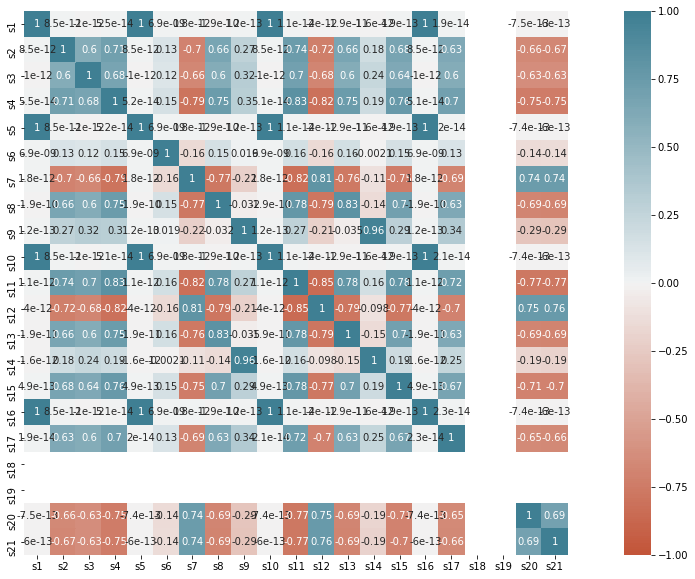

In [ ]:
# Realizando un correlograma
plt.figure(figsize = (20,10))
corr = dataset.iloc[:,2:-2].corr()
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20,220, n = 200),
    square = True,
    annot = True
)

In [ ]:
# Eliminar columnas de valores constantes
col = ['s1','s5','s10','s16','s18','s19']
dataset = dataset.drop(columns=col, axis = 1) #eliminar columnas
dataset.head()

,Activo_id,ciclo,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,max_ciclo,count_down
0,1,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187


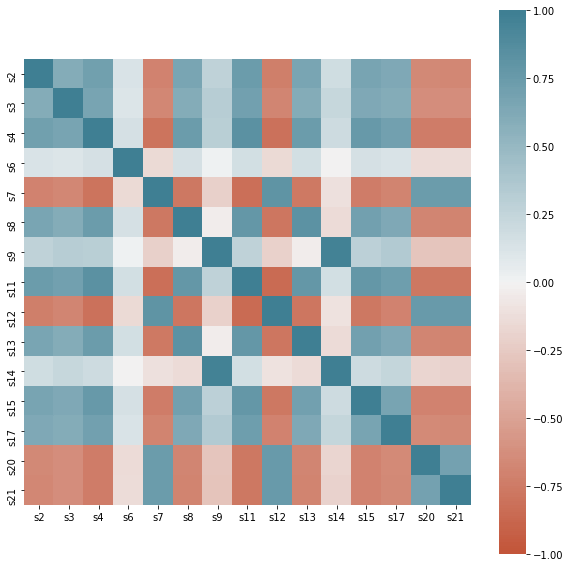

In [ ]:
#Realizando el correlograma con el dataset modificado
plt.figure(figsize=(10,10))
corr = dataset.iloc[:,2:-2].corr()
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20,220, n = 200),
    square = True
)

In [ ]:
# Elimando datos sobre sensores que no aportan valor
col = ['s6','s9','s14']
dataset = dataset.drop(columns=col,axis = 1)
dataset.head()

,Activo_id,ciclo,s2,s3,s4,s7,s8,s11,s12,s13,s15,s17,s20,s21,max_ciclo,count_down
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,192,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,192,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,192,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,192,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,192,187


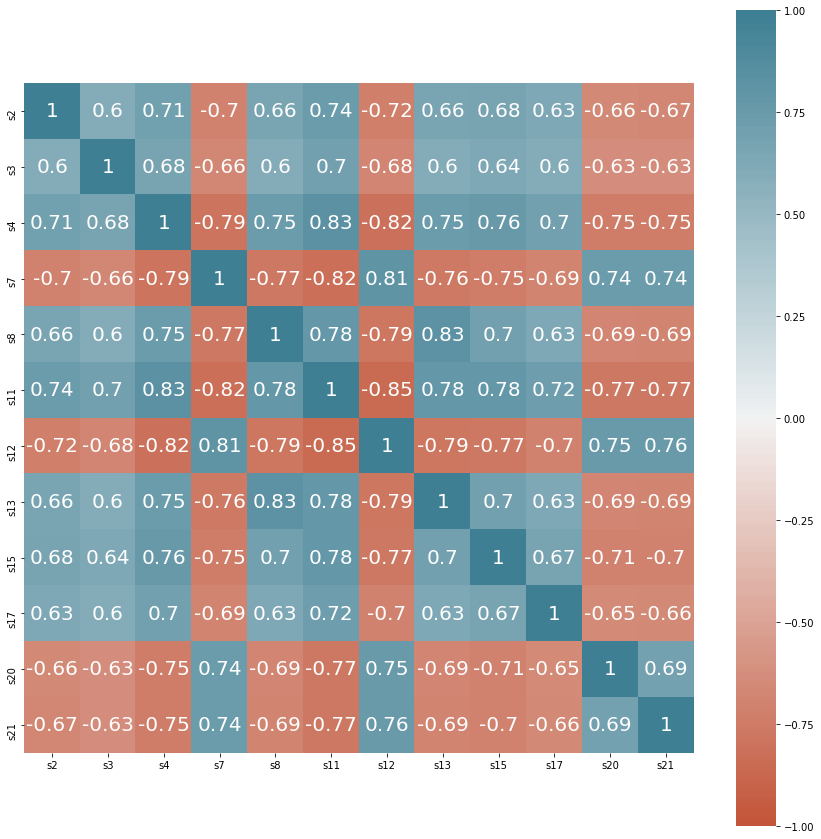

In [ ]:
plt.figure(figsize = (15,15))
corr = dataset.iloc[:,2:-2].corr()
ax = sns.heatmap(corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20,220, n = 200),
    square = True,
    annot = True,
    annot_kws = {'size': 20})

In [ ]:
#determinar si existe alguna correlación entre los sensores s11 y s12
X = dataset.query("Activo_id == 1").loc[:,['s11']].values
Y = dataset.query("Activo_id == 1").loc[:,['s12']].values
print(X.shape,Y.shape)

(192, 1) (192, 1)


MODELO DE REGRESIÓN LLINEAL

In [ ]:
 # Dividir el data set en conjunto de entrenamiento y conjunto d testing
 #random_state: semilla
 # sklearn.model_selection
 #train_test_split
 #test_size 
 
 from sklearn.model_selection import train_test_split
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
 print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(153, 1) (39, 1) (153, 1) (39, 1)


In [ ]:
# Creando el modelo de regresión
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train) #Ajustar el modelo al de entrenamiento  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Haciendo una predicción
Y_pred = regression.predict(X_test)

In [ ]:
#Comparando resultados
comparativa = np.concatenate([Y_test,Y_pred], axis = 1)
comparativa = pd.DataFrame(comparativa, columns = ['Valor Real','Predicción'])
comparativa.head()

,Valor Real,Predicción
0,521.53,521.202391
1,521.77,522.127815
2,520.63,521.017306
3,522.31,521.780781
4,521.34,521.179255


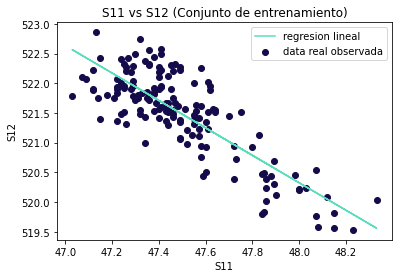

In [ ]:
# Visualizando los resultados del modelo
plt.scatter(X_train,Y_train, color = '#140B4A', label = 'data real observada')
plt.plot(X_train, regression.predict(X_train), color = '#5ADDBB', label = 'regresion lineal')

plt.title('S11 vs S12 (Conjunto de entrenamiento)')
plt.xlabel('S11')
plt.ylabel('S12')
plt.legend(loc = 'best')
plt.show()

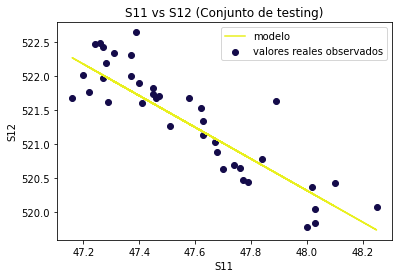

In [ ]:
#Visualizar los datos sobre la predicción
plt.scatter(X_test, Y_test,color = '#140B4A', label = 'valores reales observados' )
plt.plot(X_test,regression.predict(X_test),color = '#E9F01F', label = 'modelo')
plt.title('S11 vs S12 (Conjunto de testing)')
plt.xlabel('S11')
plt.ylabel('S12')
plt.legend(loc = 'best')
plt.show()

In [ ]:
print(regression.coef_, regression.intercept_)

[[-2.31356]] [631.37411836]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
print(r2_score(Y_test,Y_pred)) # coeficiente de determinación
print(regression.score(X_test,Y_test)) # coeficiente de correlación
print(mean_squared_error(Y_test,Y_pred)) # MSE
print(mean_absolute_error(Y_test,Y_pred)) # MAE

0.7782418602214243
0.7782418602214243
0.13785906037197398
0.30480301454868963


In [ ]:
corr 

,s2,s3,s4,s7,s8,s11,s12,s13,s15,s17,s20,s21
s2,1.000000,0.602610,0.714949,-0.702136,0.662325,0.740020,-0.724578,0.661792,0.675975,0.629886,-0.661841,-0.668050
s3,0.602610,1.000000,0.678413,-0.664595,0.602481,0.695900,-0.680307,0.600963,0.639921,0.600017,-0.625941,-0.633901
s4,0.714949,0.678413,1.000000,-0.793130,0.746852,0.830136,-0.815591,0.745158,0.758459,0.703499,-0.748067,-0.745193
s7,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.822805,0.812713,-0.764611,-0.747051,-0.692893,0.736163,0.737447
s8,0.662325,0.602481,0.746852,-0.767132,1.000000,0.782213,-0.786540,0.826084,0.700949,0.627785,-0.687030,-0.688840
s11,0.740020,0.695900,0.830136,-0.822805,0.782213,1.000000,-0.846884,0.780761,0.780913,0.722296,-0.771510,-0.772554
s12,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.846884,1.000000,-0.788441,-0.766052,-0.703485,0.751943,0.756263
s13,0.661792,0.600963,0.745158,-0.764611,0.826084,0.780761,-0.788441,1.000000,0.697662,0.627410,-0.686172,-0.688948
s15,0.675975,0.639921,0.758459,-0.747051,0.700949,0.780913,-0.766052,0.697662,1.000000,0.669205,-0.707671,-0.704043
s17,0.629886,0.600017,0.703499,-0.692893,0.627785,0.722296,-0.703485,0.627410,0.669205,1.000000,-0.651021,-0.658710
